## W3-class2

Understanding k-nearest neighbor classification.  

Import `numpy` and `matplotlib`

In [3]:
import numpy as np
import matplotlib.pyplot as plt

From `sklearn.dataset`, import the method `make_circles` as well as the k-nearest neighbor classifier `KNeighborsClassifier`

In [4]:
from sklearn.datasets import make_circles
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import train_test_split

Use the function `make_circles` to create 200 samples with a small level of noise (0.1).  Then, use the scatter function to plot these points, and give them different colors based on the classes

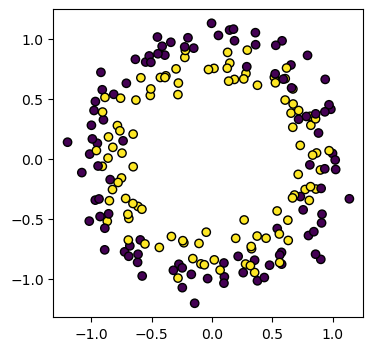

In [5]:
(X,y) = make_circles(n_samples=200, shuffle=True, noise = 0.1)
plt.figure(figsize=(4,4))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors=['black','black'])

### Your turn:

Play with `noise`, try 0.01, 0.3.  What do you see?

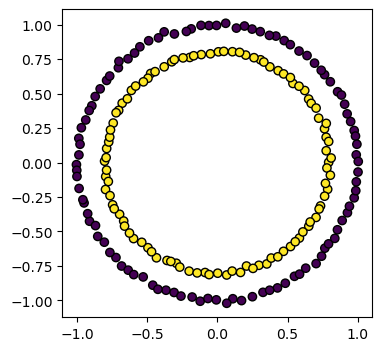

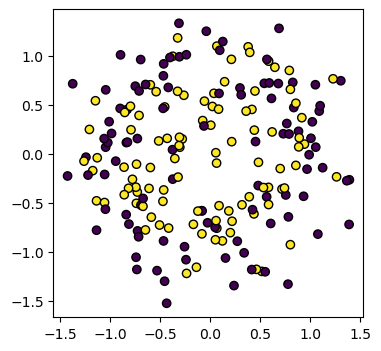

In [7]:
(X,y) = make_circles(n_samples=200, shuffle=True, noise = 0.01)
plt.figure(figsize=(4,4))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors=['black','black'])
(X,y) = make_circles(n_samples=200, shuffle=True, noise = 0.3)
plt.figure(figsize=(4,4))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors=['black','black'])
plt.show()

Now, initialize your k-nearest neighbor model, choosing some value for $k$

In [8]:
model = knn(3)

Train your model using the data from before, using the function `fit`, and compute the training error using the function `score`

In [12]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3)
model.fit(Xtrain,ytrain)
model.score(Xtrain,ytrain)

0.7428571428571429

You can now look at the decision boundary from the trained model. This can be done by building a `meshgrid` of points. You can use the function to do this

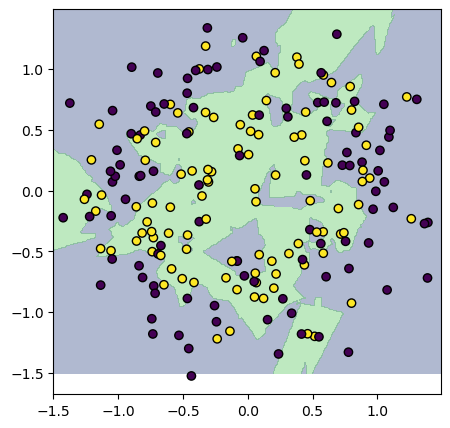

In [14]:
x_min,x_max,y_min,y_max,h = -1.5,1.5,-1.5,1.5,.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
plt.figure(figsize=(5,5))
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4,levels=1)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors=['black','black'])
plt.show()

### Your turn:
Play with the neighborhood size `k`.  What happens to the score and the shape of the boundary as you increase `k`.  Try different k's; e.g., 1, 5, 11.  What do you observe?

### Your turn:

Let's try to find the appropriate hyperparameter `k` using scikit-learn's train test split.  Generate 300 new points for this purpose.  Set 1/3 of your data as test set. 

In [33]:
(X,y) = make_circles(n_samples=300,shuffle=False,noise = 0.1)
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3)

Train the model on the training set.  Evaluate the score on the training set **and** the test set.

In [34]:
model = knn(30)
model.fit(Xtrain,ytrain)
print(model.score(Xtrain,ytrain))
print(model.score(Xtest,ytest))

0.780952380952381
0.7222222222222222


Now visualize the result by displaying the decision boundary and overlaying the test set.

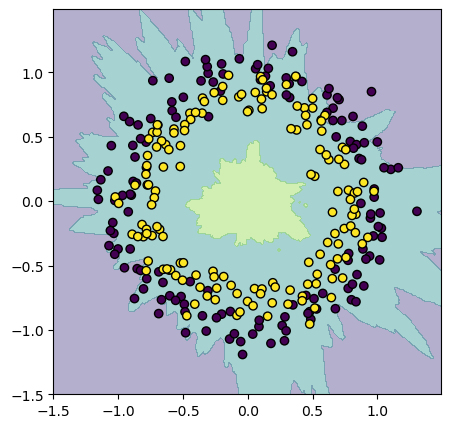

In [36]:
x_min,x_max,y_min,y_max,h = -1.5,1.5,-1.5,1.5,.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
plt.figure(figsize=(5,5))
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4,levels=1)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors=['black','black'])
plt.show()

Is there a k value where the training set score is about the same as the test set score? Why is this important?

### Note

This is a preview of Neural Network Classifier that we will go over later in the semester, and may be skipped.

In [27]:
from sklearn.neural_network import MLPClassifier

In [28]:
model2 = MLPClassifier(hidden_layer_sizes=10,max_iter=1000)

In [29]:
model2.fit(X,y)

MLPClassifier(hidden_layer_sizes=10, max_iter=1000)

In [30]:
model2.score(X,y)

0.5933333333333334

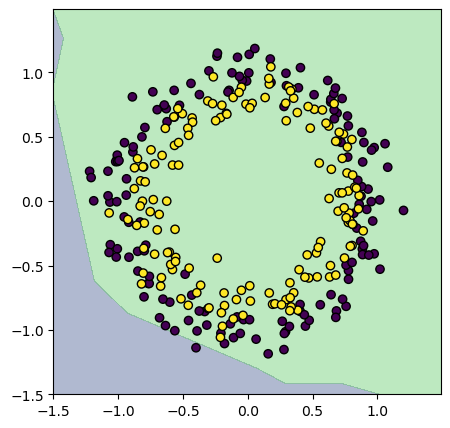

In [32]:
x_min,x_max,y_min,y_max,h = -1.5,1.5,-1.5,1.5,.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model2.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
plt.figure(figsize=(5,5))
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4,levels=1)
plt.scatter(X[:, 0], X[:, 1], c=y,edgecolors=['black','black'])
plt.show()